In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
# Extract Tesla stock data
tesla = yf.Ticker('TSLA')

# Get the stock history data for Tesla
tesla_stock_data = tesla.history(period="max")

# Display the first few rows of Tesla stock data
tesla_stock_data.head()

In [ ]:
tesla_revenue_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

response = requests.get(tesla_revenue_url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize an empty list to store revenue data rows
tesla_revenue_list = []

# Extract the revenue data from the HTML table
table = soup.find('table')  # Locate the table containing the data
if table:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue data

        # Append the data as a dictionary to the list
        tesla_revenue_list.append({"Date": date, "Revenue": revenue})

tesla_revenue_data = pd.DataFrame(tesla_revenue_list)

tesla_revenue_data


In [ ]:
# Extract GameStop stock data
gamestop = yf.Ticker('GME')

# Get the stock history data for GameStop
gamestop_stock_data = gamestop.history(period="max")

# Display the first few rows of GameStop stock data
gamestop_stock_data.head()

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

gme_revenue_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

response = requests.get(gme_revenue_url)

soup = BeautifulSoup(response.content, 'html.parser')

gme_revenue_list = []

table = soup.find('table')  # Locate the table containing the data
if table:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue data

        # Append the data as a dictionary to the list
        gme_revenue_list.append({"Date": date, "Revenue": revenue})

gme_revenue_data = pd.DataFrame(gme_revenue_list)

print("Last 5 rows of GameStop revenue data:")
print(gme_revenue_data.tail())


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
gme_revenue_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

response = requests.get(gme_revenue_url)

soup = BeautifulSoup(response.content, 'html.parser')

gme_revenue_list = []

table = soup.find('table')  # Locate the table containing the data
if table:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue data

        # Append the data as a dictionary to the list
        gme_revenue_list.append({"Date": date, "Revenue": revenue})

gme_revenue_data = pd.DataFrame(gme_revenue_list)

gme_revenue_data.reset_index(drop=True, inplace=True)

gme_revenue_data.to_csv('gme_revenue_data.csv', index=False)


print("First 5 rows of GameStop revenue data:")
print(gme_revenue_data.head())

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
tesla_revenue_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

response = requests.get(tesla_revenue_url)

soup = BeautifulSoup(response.content, 'html.parser')

tesla_revenue_list = []

table = soup.find('table')  # Locate the table containing the data
if table:
    rows = table.find_all('tr')
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(',', '').replace('$', '')  # Clean the revenue data

        tesla_revenue_list.append({"Date": date, "Revenue": revenue})

tesla_revenue_data = pd.DataFrame(tesla_revenue_list)

print("Last 5 rows of Tesla revenue data:")
print(tesla_revenue_data.tail())

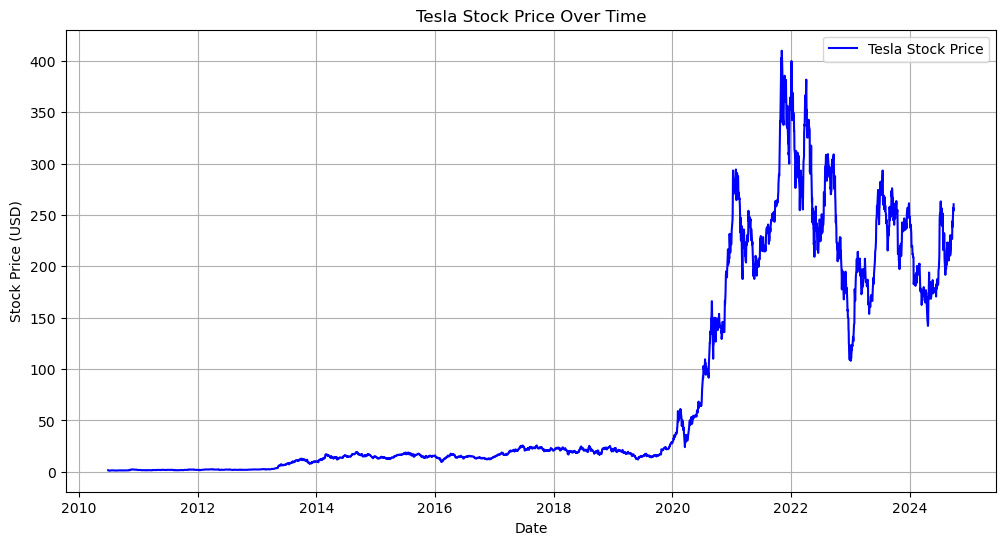

In [46]:
import matplotlib.pyplot as plt
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
def make_graph(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Tesla Stock Price', color='blue')
    plt.title('Tesla Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

make_graph(tesla_data)

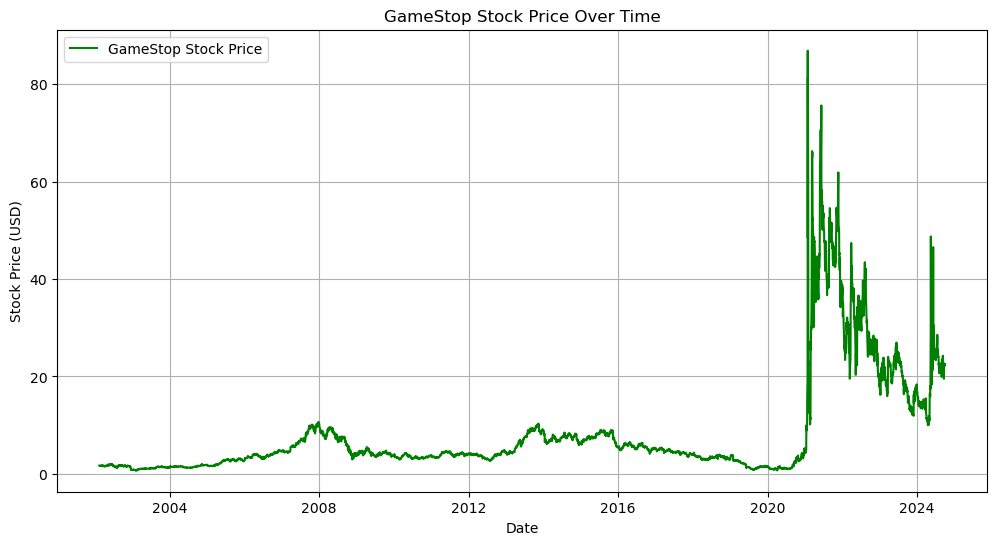

In [48]:
import matplotlib.pyplot as plt

gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period="max")  # Fetch historical data

def make_graph(data):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(data.index, data['Close'], label='GameStop Stock Price', color='green')  # Plot closing prices
    plt.title('GameStop Stock Price Over Time')  # Set the title of the graph
    plt.xlabel('Date')  # Label for the x-axis
    plt.ylabel('Stock Price (USD)')  # Label for the y-axis
    plt.legend()  # Show the legend
    plt.grid()  # Add a grid to the background
    plt.show()  # Display the plot
make_graph(gamestop_data)
